In [1]:
import numpy as np
import pandas as pd
import os
%matplotlib notebook
import matplotlib.pyplot as plt
import sys
import copy

In [2]:
%load_ext autoreload
%autoreload 2

sys.path.append( r"c:\Users\emeraldgeomodelling\Software\ga-aem-win10exe\python" )
from gaaem_utils import *

In [3]:
data_dir=r"c:\Users\emeraldgeomodelling\Software\ga-aem-win10exe\examples\bhmar-skytem\galeisbstdem\output_nompi_parallel"
data_file=r"inversion.output.0002.asc"
data_fullfile=os.path.join(data_dir, data_file)

In [4]:
model=read_GAAEM_data(data_fullfile)

In [5]:
model["flightlines"].shape

(1260, 32)

In [6]:
for c in model["flightlines"].columns:
    print("{0} : {1}".format(c, model["flightlines"].loc[0,c] ))

uniqueid : 2
survey : 1216
date : 20090803
flight : 20090803
line : 24000
fiducial : 1261441.0
easting : 603049.5
northing : 6413464.5
elevation : 68.64
tx_height : 29.1
tx_roll : 4.28
tx_pitch : -11.07
tx_yaw : 0.0
txrx_dx : -12.8
txrx_dy : -0.16
txrx_dz : -0.31
rx_roll : 4.28
rx_pitch : -11.07
rx_yaw : 0.0
nlayers : 30
AlphaC : 1.0
AlphaT : 0.0
AlphaG : 1.0
AlphaS : 333.0
PhiD : 0.9815471
PhiM : 0.2612786
PhiC : 0.228767
PhiT : 0.0
PhiG : 0.0
PhiS : 0.03251162
Lambda : 35.73596
Iterations : 18


<IPython.core.display.Javascript object>


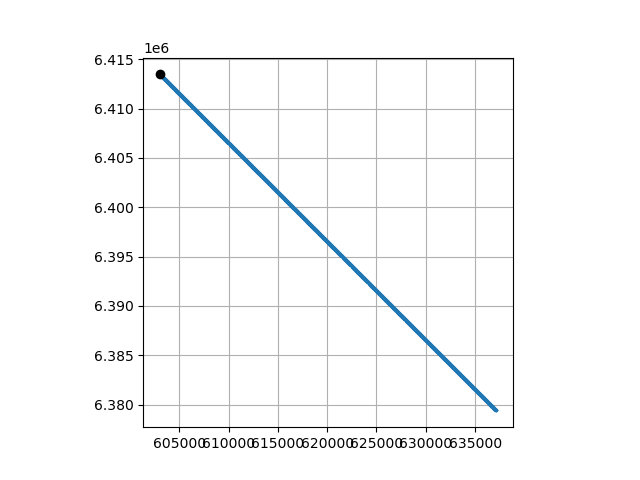

In [13]:
fig, ax = plt.subplots()
ax.plot(model["flightlines"].easting, model["flightlines"].northing, ".-", ms=3)
ax.plot(model["flightlines"].easting.iloc[0], model["flightlines"].northing.iloc[0], "ko")

ax.set_aspect("equal")
ax.grid()

In [8]:
model["layer_data"].keys()

dict_keys(['conductivity', 'thickness', 'observed_EMSystem_1_ZS', 'observed_EMSystem_2_ZS', 'noise_EMSystem_1_ZS', 'noise_EMSystem_2_ZS', 'predicted_EMSystem_1_ZS', 'predicted_EMSystem_2_ZS'])

In [9]:
calc_lineOffset(model)

In [10]:
model["flightlines"].columns

Index(['uniqueid', 'survey', 'date', 'flight', 'line', 'fiducial', 'easting',
       'northing', 'elevation', 'tx_height', 'tx_roll', 'tx_pitch', 'tx_yaw',
       'txrx_dx', 'txrx_dy', 'txrx_dz', 'rx_roll', 'rx_pitch', 'rx_yaw',
       'nlayers', 'AlphaC', 'AlphaT', 'AlphaG', 'AlphaS', 'PhiD', 'PhiM',
       'PhiC', 'PhiT', 'PhiG', 'PhiS', 'Lambda', 'Iterations', 'lineoffset'],
      dtype='object')

In [11]:
make_XYZ_model(model)

<IPython.core.display.Javascript object>


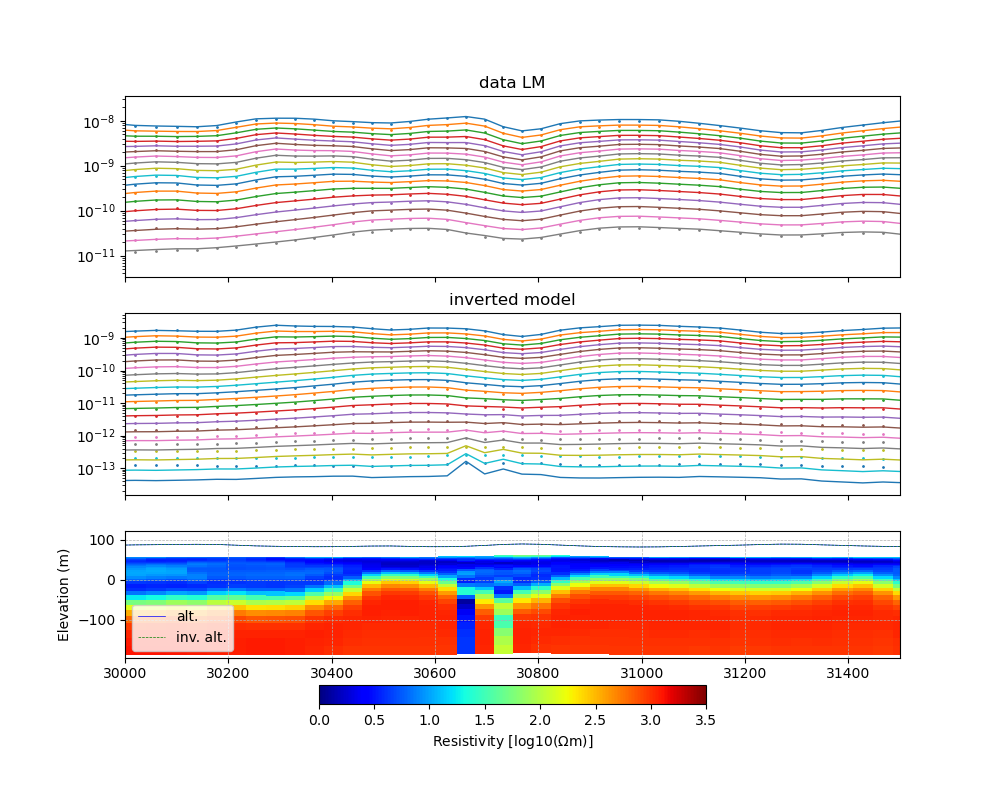

c:\Users\emeraldgeomodelling\Software\ga-aem-win10exe\python\gaaem_utils\__init__.py:62: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  pm=ax.pcolormesh(local_x, depth, image_data, cmap=cmap, shading='auto', vmin=clim[0], vmax=clim[1] )


(30000.0, 31500.0)

In [12]:
fig, ax = plt.subplots(3,1,figsize=(10,8), sharex=True)
ax[0].plot(model["flightlines"].lineoffset, 
          model["layer_data"]["observed_EMSystem_1_ZS"].abs(),
          ".", ms=2,
          label="observed_EMSystem_1_ZS")
ax[0].set_prop_cycle(None)
ax[0].plot(model["flightlines"].lineoffset, 
          model["layer_data"]["predicted_EMSystem_1_ZS"].abs(),
          "-", lw=1,
          label="predicted_EMSystem_1_ZS")
ax[0].set_yscale("log")
ax[0].set_title("data LM")

ax[1].plot(model["flightlines"].lineoffset, 
          model["layer_data"]["observed_EMSystem_2_ZS"].abs(),
           ".", ms=2,
          label="observed_EMSystem_2_ZS")
ax[1].set_prop_cycle(None)
ax[1].plot(model["flightlines"].lineoffset, 
          model["layer_data"]["predicted_EMSystem_2_ZS"].abs(),
           "-", lw=1,
          label="predicted_EMSystem_2_ZS")
ax[1].set_yscale("log")
ax[1].set_title("data HM")

plot_model_section(model, ax=ax[2], keyx="lineoffset", hideBelowDOI=False, cb_orientation="horizontal", clim=[0, 3.5])
ax[1].set_title("inverted model")

ax[0].set_xlim([30000, 31500])